In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

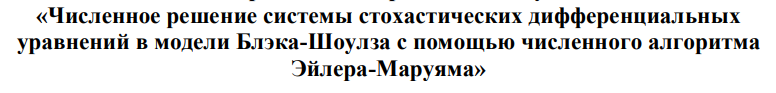

In [21]:
S0 = 6  # стоимость акциии в начале
K = 3   # страйк 
T = 1   # время жизни опциона
r = 0.15   # процентная ставка
sigma = 0.25   # волатильность 
n = 10    # точки разбиения
n_traj = 100  # число траекторий Винеровского процесса
# найти C_T цену опциона, S_T цену акции
h = T/n  # шаг разбиения

# Моделирование Винеровского процесса

In [22]:
W = np.zeros((n_traj, n+1))
randn = np.random.normal(loc = 0, scale = 1, size = (n_traj, n)) * np.sqrt(h)
W[:, 1:] = np.cumsum(randn, axis = 1)

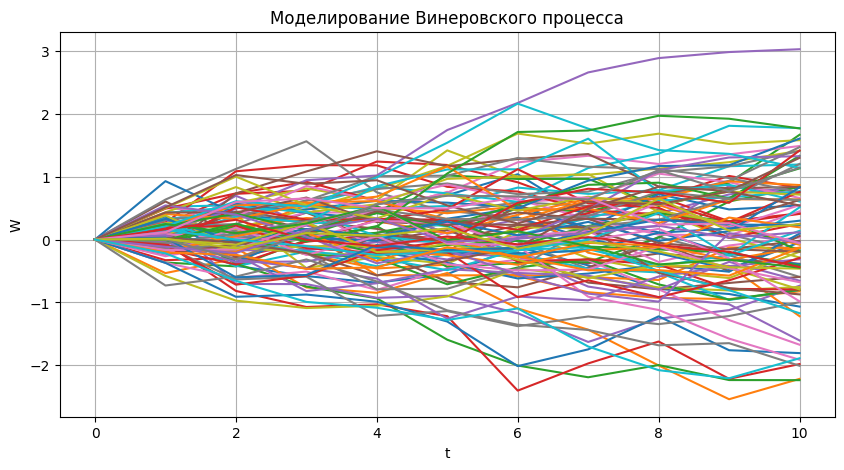

In [23]:
fig, ax = plt.subplots(figsize = (10,5))
for i, traj in enumerate(W):
  ax.plot(np.arange(n+1), traj, label = f'Траектория {i}')

ax.set_xlabel('t')
ax.set_ylabel('W')
ax.grid()
ax.set_title('Моделирование Винеровского процесса');

# Блэк-Шоулз:

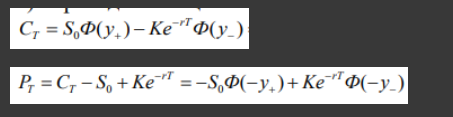

In [24]:
d1 = (np.log(S0/K) + T * (r+sigma**2/2))/(sigma*np.sqrt(T))
d2 = (np.log(S0/K) + T*(r-sigma**2/2))/(sigma*np.sqrt(T))
print(d1, d2)

3.4975887222397812 3.2475887222397812


In [25]:
Ct = S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
Pt = Ct - S0 + K * np.exp(-r*T)
print('колл опцион', Ct, '\nпут опцион', Pt)

колл опцион 3.4179702502373583 
пут опцион 9.417951253176682e-05


# Эйлер-Маруяма: 

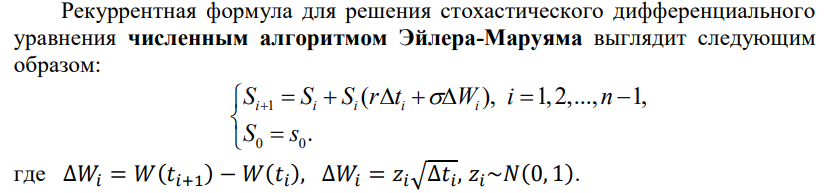

In [27]:
# Генерируем траектории Винеровского процесса
dt = T / n
dW = np.random.normal(0, np.sqrt(dt), size=(n, n_traj))
W = np.cumsum(dW, axis=0)

# Вычисляем цены опционов на каждом шаге
S = np.zeros((n+1, n_traj))
S[0] = S0
for i in range(n):
    S[i+1] = S[i] + r*S[i]*h + sigma*S[i]*np.sqrt(h)*dW[i]

# Вычисляем справедливую цену опциона при помощи численного метода Эйлера-Маруяма
C = np.zeros(n_traj)
for j in range(n_traj):
    Geometric_Average = np.exp(np.mean(np.log(S[:,j])))
    CallPayoff = max(Geometric_Average - K, 0)
    C[j] = np.exp(-r*T)*CallPayoff

# Вычисляем среднюю справедливую цену опциона
C_T = np.mean(C)

# Вычисляем цены акций на момент окончания опциона
S_T = S[-1]

print("Справедливая цена опциона:", C_T)
print("Цена акции на момент T:", S_T)

Справедливая цена опциона: 2.990014109061249
Цена акции на момент T: [6.1403368  7.84059956 6.5978261  6.22037669 7.36334566 5.94979163
 6.43369766 7.54576252 7.78713309 7.63396774 7.69392198 6.12158482
 7.4136951  6.54714117 7.68048948 7.92889698 6.76238166 7.31310394
 6.98795833 6.91039829 6.99513931 6.34559335 7.46661676 7.52023571
 7.11424172 6.80810103 7.33293062 7.81057329 6.82582475 6.62170013
 7.71302123 6.93043391 6.85058357 7.13272469 6.03533084 7.66484513
 6.73944326 6.06201591 7.10296592 7.57165529 7.80772702 6.92144608
 6.18057928 6.62638838 6.38755435 5.72550935 7.80789197 7.40174579
 6.36419802 6.80260247 7.53025601 7.47584799 7.05560402 8.01770955
 6.86619985 7.89440834 6.77703115 7.23658462 6.36524864 7.42168786
 7.31868594 6.5607441  7.0541488  7.52214614 6.83026959 7.49405554
 6.93551808 7.00282818 6.80000231 6.2587305  8.13419864 7.44284221
 7.16745528 6.34124535 7.71145366 6.16684908 6.70166713 6.73588681
 6.85053982 7.21564665 7.07633474 7.30246985 6.79904543 6.89

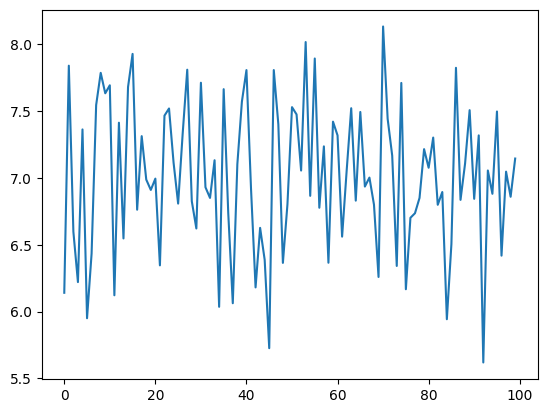

In [29]:
plt.plot(S_T);

Чтобы оценить сходимость метода, необходимо провести серию экспериментов с разными `dt` и посчитать среднеквадратическую ошибку для каждого значения `dt`:

In [33]:
def euler_maruyama(T, N, dt, x0, f, g):

    x = np.zeros((N+1, len(x0)))
    x[0,:] = x0
    
    for i in range(N):
        dW = np.random.normal(size=len(x0)) * np.sqrt(dt)
        x[i+1,:] = x[i,:] + f(x[i,:]) * dt + g(x[i,:]) * dW
    
    return x

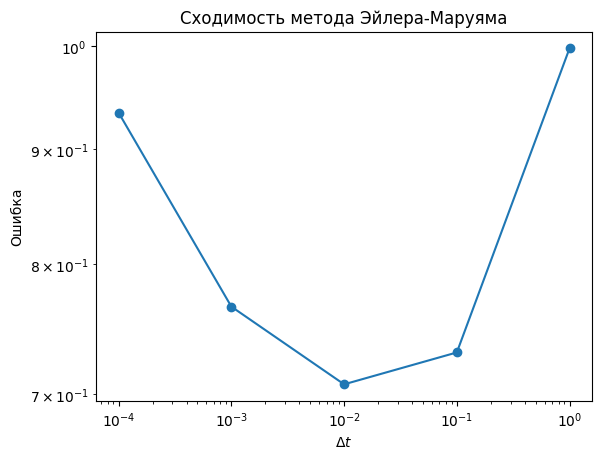

In [35]:
T = 1
N = 1000
x0 = np.array([0])
f = lambda x: -x
g = lambda x: 1

errors = []
dts = np.logspace(-4, 0, 5)

for dt in dts:
    num_trajectories = 100
    errors_dt = []
    for i in range(num_trajectories):
        x_exact = np.exp(-np.arange(N+1)*dt)
        x_euler = euler_maruyama(T, N, dt, x0, f, g)[:,0]
        error = np.linalg.norm(x_exact - x_euler) / np.sqrt(N)
        errors_dt.append(error)
    errors.append(np.mean(errors_dt))

plt.loglog(dts, errors, '-o')
plt.xlabel('$\Delta t$')
plt.ylabel('Ошибка')
plt.title('Сходимость метода Эйлера-Маруяма')
plt.show()